1. Preparing the Data
2. Building and Training the Neural Network
3. Visualizing Loss and Accuracy
4. Adding Regularization to  Neural Network

In [110]:
import pandas as pd
# For data frames.
import pandas as pd
# For numerical arrays.
import tensorflow as tf
import numpy as np
%matplotlib inline
# For preprocessing data.
import seaborn as sb 
#for pairplat
import sklearn.preprocessing as pre
# For splitting data sets.
import sklearn.model_selection as mod
# For whitening.
import sklearn.decomposition as dec


# Preparing

In [111]:
data=tf.keras.datasets.boston_housing
(x_train,y_train),(x_test,y_test)=data.load_data()

print("train data",x_train.shape)
print("train labels",y_train.shape)
print("test data",x_test.shape)
print("train labels",y_test.shape)

train data (404, 13)
train labels (404,)
test data (102, 13)
train labels (102,)


In [112]:
from sklearn.datasets import load_boston
boston = load_boston()

#complie data to give correct headings and place on readable table.
bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos.head()
#df = pd.read_csv('housing.csv')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [113]:
#crime= per capita crime rate 

column_names = ['crime', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
                'TAX', 'PTRATIO', 'B', 'LSTAT']
df_xtrain = pd.DataFrame(x_train,columns=column_names)
df_xtrain.head()

,crime,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65


In [114]:
#standardized/normalized data
mean=x_train.mean(axis=0)
std=x_train.std(axis=0)

x_train2=(x_train-mean)/std

df_train_norm = pd.DataFrame(x_train2,columns=column_names)
df_train_norm.head()

,crime,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.272246,-0.483615,-0.435762,-0.256833,-0.165227,-0.176443,0.813062,0.116698,-0.626249,-0.595170,1.148500,0.448077,0.825220
1,-0.403427,2.991784,-1.333912,-0.256833,-1.215182,1.894346,-1.910361,1.247585,-0.856463,-0.348433,-1.718189,0.431906,-1.329202
2,0.124940,-0.483615,1.028326,-0.256833,0.628642,-1.829688,1.110488,-1.187439,1.675886,1.565287,0.784476,0.220617,-1.308500
3,-0.401494,-0.483615,-0.869402,-0.256833,-0.361560,-0.324558,-1.236672,1.107180,-0.511142,-1.094663,0.784476,0.448077,-0.652926
4,-0.005634,-0.483615,1.028326,-0.256833,1.328612,0.153642,0.694808,-0.578572,1.675886,1.565287,0.784476,0.389882,0.263497


In [115]:
print(x_train.shape)
print(y_train.shape)

(404, 13)
(404,)


In [116]:
#combining x_train and y_train for fidning the corealation between sales

training_data=np.insert(arr=x_train,values=y_train,axis=1,obj=13)

column_names = ['crime' ,'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
                'TAX', 'PTRATIO', 'B', 'LSTAT','price']



df_train = pd.DataFrame(training_data,columns=column_names)
df_train.head()

,crime,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72,15.2
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11,42.3
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01,21.1
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65,17.7


          0
0     crime
1        ZN
2     INDUS
3      CHAS
4       NOX
5        RM
6       AGE
7       DIS
8       RAD
9       TAX
10  PTRATIO
11        B
12    LSTAT


KeyError: 0

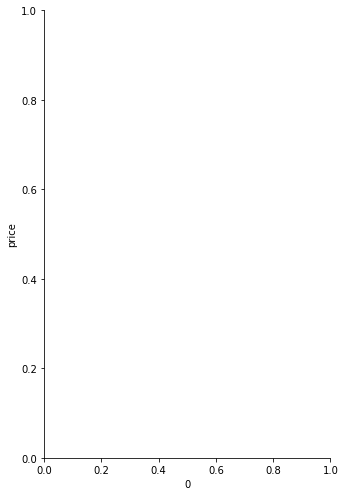

In [117]:
# import pandas as pd
import pandas as pd
import seaborn as sb
 
# list of strings
column_names = ['crime', 'ZN','INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
                'TAX', 'PTRATIO', 'B', 'LSTAT']
 
# Calling DataFrame constructor on list
df = pd.DataFrame(column_names)
print(df)
sb.pairplot(df_train,x_vars=df.columns[:3],y_vars=df_train.columns[13:],size=7,aspect=0.7,kind='reg')

In [ ]:
#sb.pairplot(df,x_vars=df.columns[3:6],y_vars=df.columns[13:],size=7,aspect=0.7,kind='reg')

In [ ]:
df.corr()

In [ ]:
#duplicate
#print(x_train.shape)
#print(y_train.shape)
#print(training_data.shape)
#print(x_test.shape)
#print(y_test.shape)

In [118]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense


def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [1000$]')
  plt.plot(history.epoch, np.array(history.history['mean_absolute_error']),
           label='Train Loss')
  plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),
           label = 'Val loss')
  plt.legend()
  plt.ylim([0,7])



In [119]:
from keras.models import Sequential
from keras.layers import Dense

Epochs=500
Optimizer=tf.compat.v1.Optimizer ((0.001)
#Optimizer='adam'
#Loss="mse"
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(64,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(1))

#model.compile(optimizer=Optimizer,loss=Loss,metrics=['mae'])

earlystop=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=30)

history=model.fit(x_train,y_train,epochs=Epochs,validation_split=0.2,verbose=2,callbacks=[earlystop])
plot_history(history)

SyntaxError: invalid syntax (<ipython-input-119-a2c4f50ff818>, line 8)

In [120]:
loss,mae=model.evaluate(x_test,y_test)
print(' loss=' ,loss , '\n mae=', mae)

RuntimeError: You must compile a model before training/testing. Use `model.compile(optimizer, loss)`.

In [ ]:
all_price_sum = y_train.sum()+y_test.sum()
Number_of_prices = y_train.size+y_test.size  #number of all labels
print(all_price_sum)
print(Number_of_prices)
print("Average of prices of all the data = ",all_price_sum/Number_of_prices)

 RESULTS (last epoch's mae)train,test op=adam (64,64) = 3.7 , 8.83 (128,128) = 3.6 , 3.9 (256,256) = 2.9 , 4.05 (128,64,64) = 2.8 , 3.7 op=RMSProp(0.0010) (64,64) = 4.6,6.5 (128,128) = 3.2,3.9 (256,256) = 3.09,4.1 (128,64) = 2.8,3.6 '''

considering that the avg of prices is 22,000 while our mean absolute error on test result is around 3 to 4.5k which is not that good but not that bad either

In [ ]:
dataset=bos.values
dataset

In [ ]:
X = dataset[:,0:10]
Y = dataset[:,13]
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

# Building and Training our First Neural Network. 

In [ ]:
from keras.models import Sequential
from keras.layers import Dense


In [ ]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])


In [ ]:
#model=Sequential()
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

In [ ]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'],)
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

In [ ]:
#Dense(32, activation='relu', input_shape=(10,)),

In [ ]:
#Dense(32, activation='relu'),

In [ ]:
#Dense(1, activation='sigmoid'),

In [ ]:
#model.compile(optimizer='sgd',
 #             loss='binary_crossentropy',
  #            metrics=['accuracy'])

In [ ]:
#optimizer='sgd'

In [ ]:
#loss='binary_crossentrophy'

In [ ]:
#metricc=['accuracy']

In [ ]:
#hist = model.fit(X_train, Y_train,
 #         batch_size=32, epochs=100,
  #        validation_data=(X_val, Y_val))

In [ ]:
#model.evaluate(X_test, Y_test)[1]

### Visualizing Loss and Accuracy

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

# Neural Network in Keras.

##### Exploring and Processing the Data
##### Building and Training our Neural Network
##### Visualizing Loss and Accuracy
##### Adding Regularization to our Neural Network

### Exploring and Processing the Data

Before we code any ML algorithm, the first thing we need to do is to put our data in a format that the algorithm will want. In particular, we need to:

###### Read in the CSV (comma separated values) file and convert them to arrays. Arrays are a data format that our algorithm can process.
###### Split our dataset into the input features (which we call x) and the label (which we call y).
###### Scale the data (we call this normalization) so that the input features have similar orders of magnitude.
###### Split our dataset into the training set, the validation set and the test set.

### Import the data.

In [ ]:
# library needed
import pandas as pd

In [125]:
df = pd.read_csv('house.csv')
import sklearn 
from sklearn import datasets
boston=datasets.load_boston()
type (boston)

sklearn.utils.Bunch

In [126]:
df.isnull().sum()

tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [127]:
df # ptints out the dataset in a nice format.

,tax,ptratio,b,lstat,medv
0,296,15.3,396.90,4.98,24.0
1,242,17.8,396.90,9.14,21.6
2,242,17.8,392.83,4.03,34.7
3,222,18.7,394.63,2.94,33.4
4,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...
501,273,21.0,391.99,9.67,22.4
502,273,21.0,396.90,9.08,20.6
503,273,21.0,396.90,5.64,23.9
504,273,21.0,393.45,6.48,22.0


# convert it into arrays for our machine to process:

In [ ]:
dataset = df.values

In [ ]:
dataset

We now split our dataset into input features (X) and the feature we wish to predict (Y). To do that split, we simply assign the first 10 columns of our array to a variable called X and the last column of our array to a variable called Y.

the next step in our processing is to make sure that the scale of the input features are similar.
One way to scale the data is to use an existing package from scikit-learn.

In [ ]:
X = dataset[:,0:20]

In [ ]:
Y = dataset[:,4]

In [ ]:
from sklearn import preprocessing

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)


In [ ]:
X_scale #scaled dataset is stored in the array ‘X_scale’. to see what ‘X_scale’ looks like

to split our dataset into a training set, a validation set and a test set.

We will use the code from scikit-learn called ‘train_test_split’, which as the name suggests, split our dataset into a training set and a test set. 

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.5) # split your dataset


In [ ]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [ ]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)